# Data Analyst Nanodegree

## P2:Investigate Titanic Dataset 

### Introduction:


RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from  Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.[1]

In this report we will analyze the Titanic dataset wich is include the information of 891 out of 2224 passenger and crew,to find what is the factors that made people more likely to survive.The dataset is cvs file which was obtained from(kaggle.com).

### Questions for Investigation

1- What is the number of people survived and not survived on titanic?

2-How much woman and men on titanic ?And wich gender has the high chance to survived?

3- How the age played role in people survival?

4-How much passenger survived has family on titanic?

5-Did the class affect the survivor chance? Did people in upper class have more likly to survive than poor people in 3th class?

#### Data Wrangling
#### Missing Values :

The dataset is 891 of 2224 passengers ,there is some missing values in age column and we can't delete these rows because the dataset is small so we replac it with the passengers avrege ages .

#### Create a new column :

Create a new colume for Family if the passengers has SibSp or Parch then he/sh has family otherwise no.

We will Investigate how the variables Sex,Age,classes and family affect on survival chance . Cbin Embarked, Ticket and Fare are not include in our analysis.

In [1]:
#Import the librales that we used 

import numpy  as  np
import pandas as  pd
import unicodecsv

In [13]:
import matplotlib.pyplot as plt

In [2]:
#import display to view data
from IPython.display import display

In [3]:
#Read the file CVS 
Titanic_Filename= 'C:/Users/Fareeda/Downloads/titanic-data.csv'
Titanic_pd= pd.read_csv(Titanic_Filename)

In [4]:
Titanic_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Replace the mising vlues in Age with Averge age of passengers
Titanic_pd['Age'] = Titanic_pd ['Age'].fillna(Titanic_pd['Age'].mean())

    

In [6]:
# add Family Column to the data frame 
Titanic_pd['Family']= np.where((Titanic_pd['SibSp']== 0) & (Titanic_pd['Parch']==0),0,1)

In [7]:
Titanic_pd['Survival'] = Titanic_pd.Survived.map({0 : 'Died', 1 : 'Survived'})

# Create Pclass Label Column
Titanic_pd['Class'] = Titanic_pd.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

# Create Embarked Labels Column
Titanic_pd['Ports'] = Titanic_pd.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

In [8]:
display(Titanic_pd.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Survival,Class,Ports
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Died,Third Class,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Survived,First Class,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Survived,Third Class,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Survived,First Class,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Died,Third Class,Southampton


### Data analysis

#### 1- What is the number of people survived and not survived on titanic?



In [9]:
Passenger=Titanic_pd['PassengerId'].count()
print Passenger

891


In [10]:
#Number of Survivel and unSurvivel
display(Titanic_pd.groupby('Survived').size()) 
 

Survived
0    549
1    342
dtype: int64

#### 2-How much woman and men on titanic ?And wich gender has the high chance to survived?

In [11]:
#Number of femal and male on Titanic
display (Titanic_pd.groupby('Sex').size())

Sex
female    314
male      577
dtype: int64

The number of woman are 314 and the men was 577, so the number of men are greater than woman.The percentages of male was more than half of passenger.

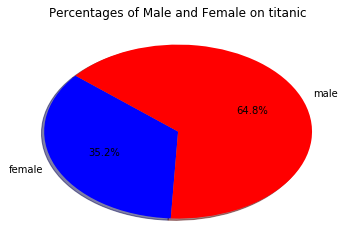

In [14]:
S = Titanic_pd.groupby('Sex').size()


labels = 'female', 'male'
colors = ['blue', 'Red']
plt.title('Percentages of Male and Female on titanic')
# Plot
plt.pie(S, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [23]:
##https://www.kaggle.com/scy1505/titanic/titanic-data-set-an-intro-to-data-analysis
#check the statuse of sevivel by sex
def WMservived(S):
    if S['Sex']=='female' and S['Survived']==1:
        return "Woman servived"
    elif S['Sex']=='female' and S['Survived']==0:
        return "Woman Died"
    elif S['Sex']=='male' and S['Survived']==1:
        return "Men servived"
    elif S['Sex']=='male' and S['Survived']==0:
        return "Mene Died"

In [24]:
Titanic_pd_C['sizes'] = Titanic_pd_C.apply(WMservived,axis=1)


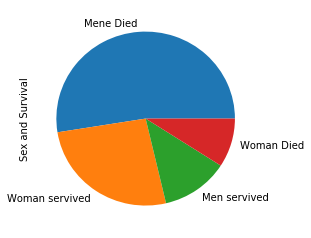

In [25]:
#https://www.kaggle.com/scy1505/titanic/titanic-data-set-an-intro-to-data-analysis
fig = plt.figure(figsize=(4,4))
Titanic_pd_C.sizes.value_counts(normalize=True).plot(kind='pie',label='Sex and Survival')
plt.show()

In [26]:
display (Titanic_pd.groupby(['Sex','Survived']).size())


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

The highest number of people did not survive was from male group and the lowest number was from femal group, and in opposite sid for survival group the femal has the highest number and mal was the lowest .

So we can see that the woman has high chance to survive than men .

#### 3- How the age played role in people survival?

In [27]:
import matplotlib.pyplot as plt



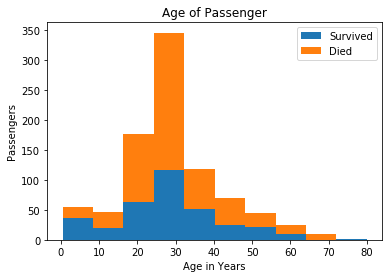

In [28]:
fig, ax = plt.subplots()

plt.hist([Titanic_pd[Titanic_pd['Survived'] == 1]['Age'], 
     Titanic_pd[Titanic_pd['Survived'] == 0]['Age']],
     stacked=True, 
     rwidth=1,label=['Survived','Died'], histtype='barstacked')
ax.set_xlabel('Age in Years')
ax.set_ylabel('Passengers')
plt.title('Age of Passenger')
plt.legend()
plt.show()

In [29]:
display (Titanic_pd.groupby(['Sex','Survived'])['Age'].mean())


Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64

 The children and young people have more chance to be survival than elderly people.


#### 4-How much passenger survived has family on titanic?

In [30]:
display (Titanic_pd.groupby(['Family','Survived']).size())


Family  Survived
0       0           374
        1           163
1       0           175
        1           179
dtype: int64

passenger who survival and has families was 179 and those who survive without families 163, the difference between them are not so big.


#### 5-Did the class affect the survivor chance? Did people in upper class have more likly to survive than poor people in 3th class?¶



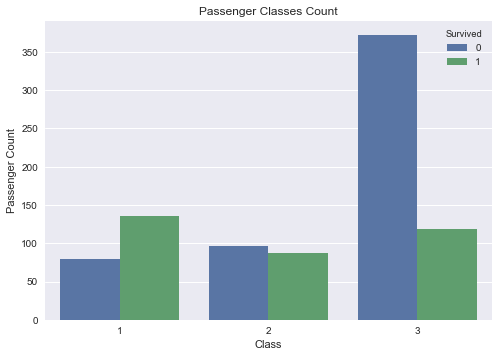

In [31]:
import seaborn as sns
new_df = Titanic_pd.groupby(['Pclass','Survived']).count().reset_index()
g=sns.barplot(x='Pclass',y='PassengerId', hue="Survived",data=new_df)
g.set_xlabel('Class')
g.set_ylabel('Passenger Count')
g.axes.set_title('Passenger Classes Count')
sns.plt.show()

People in upper class has more chance to survival than poeple in 3th class.


### limitations of Analysis:

We can say the people who was younger woman and lived in upper class will had more chance to be survival than an elderly poor man lived in 3rd class. However there is some limitations in this analysis we should mision it : There are a missing values in Aged columns it about 177 rows and we could not delete it because the dataset is already small so we fill it with the mean age of other passenger so the mean value is being massively over represented and this could affect our assumption the young people had more likely to survival).Another things is when we say the people who had families they have mor chance to survived but realy we don't know what is the real role the person play it to help his family we don't sure if they really play role to help them. the dataset itself didn't give use the detail of relation they just give SibSp, Parch also they did not mention if the family member was in the same lifeboat and did not tell when and where the people died or survived.
We could improvement our analysis by analyze the other variables embarkation,far,cabinet and do statistical test to find significant relation between variables.

### sources:

##### Udacity:
www.udacity.com

##### wikipedia:
https://en.wikipedia.org/wiki/RMS_Titanic

##### kaggle:
https://en.wikipedia.org/wiki/RMS_Titanic

##### psychology.emory.edu:

http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm

https://docs.scipy.org/doc/scipy/reference/stats.html

http://pandas.pydata.org
